In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# import the csv to df
TG_stars = pd.read_csv("../Resources/TG_stars.csv")
TG_stars.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4


In [3]:
#Adding classes names for each target
TG_stars['StarName'] = 'None'
TG_stars.loc[TG_stars['TargetClass'] == 0, 'StarName'] = 'Blue, 10 Lacerta'
TG_stars.loc[TG_stars['TargetClass'] == 1, 'StarName'] = 'Blue, Rigel'
TG_stars.loc[TG_stars['TargetClass'] == 2, 'StarName'] = 'Blue, Sirius'
TG_stars.loc[TG_stars['TargetClass'] == 3, 'StarName'] = 'Blue, White Procyon'
TG_stars.loc[TG_stars['TargetClass'] == 4, 'StarName'] = 'White, yellow Sun'
TG_stars.loc[TG_stars['TargetClass'] == 5, 'StarName'] = 'Orange, Red Arcturus'
TG_stars.loc[TG_stars['TargetClass'] == 6, 'StarName'] = 'Red, Betelguese'

In [4]:
TG_stars

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,StarName
0,9.10,3.54,1.39,0.482,16.845016,3,"Blue, White Procyon"
1,9.27,21.90,3.10,0.999,20.972221,5,"Orange, Red Arcturus"
2,6.61,2.81,0.63,-0.019,13.853532,1,"Blue, Rigel"
3,8.06,7.75,0.97,0.370,17.506509,3,"Blue, White Procyon"
4,8.55,2.87,1.11,0.902,15.839409,4,"White, yellow Sun"
...,...,...,...,...,...,...,...
9672,8.45,-0.93,1.13,1.404,13.292415,5,"Orange, Red Arcturus"
9673,7.84,4.26,1.00,1.140,15.987048,5,"Orange, Red Arcturus"
9674,9.38,3.61,1.36,0.507,17.167536,4,"White, yellow Sun"
9675,7.64,4.75,0.97,0.075,16.023468,2,"Blue, Sirius"


In [5]:
TG_stars.to_csv('./TG_stars_database.csv', index=False)

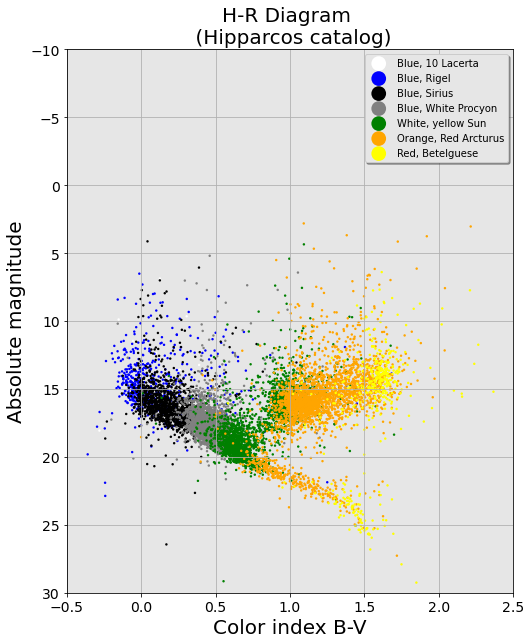

In [17]:
def plot_lum_class(x, y ,c, label):
    ''' b: boolean Series to make the selection
        c: Color
        label: for the legend
    '''
    ax.scatter(x, y, c = c, s=6, edgecolors='none', label = label)

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111, facecolor='#E6E6E6')

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(30, -10)
ax.grid()
ax.set_title('H-R Diagram \n (Hipparcos catalog)')

ax.title.set_fontsize(20)
ax.set_xlabel('Color index B-V')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Absolute magnitude')
ax.yaxis.label.set_fontsize(20)

x = TG_stars.loc[TG_stars['TargetClass'] == 0, 'B-V']
y = TG_stars.loc[TG_stars['TargetClass'] == 0, 'Amag']
plot_lum_class(x,y,'white', 'Blue, 10 Lacerta')

x = TG_stars.loc[TG_stars['TargetClass'] == 1, 'B-V']
y = TG_stars.loc[TG_stars['TargetClass'] == 1, 'Amag']
plot_lum_class(x,y,'blue', 'Blue, Rigel')

x = TG_stars.loc[TG_stars['TargetClass'] == 2, 'B-V']
y = TG_stars.loc[TG_stars['TargetClass'] == 2, 'Amag']
plot_lum_class(x,y,'black', 'Blue, Sirius')

x = TG_stars.loc[TG_stars['TargetClass'] == 3, 'B-V']
y = TG_stars.loc[TG_stars['TargetClass'] == 3, 'Amag']
plot_lum_class(x,y,'gray', 'Blue, White Procyon')

x = TG_stars.loc[TG_stars['TargetClass'] == 4, 'B-V']
y = TG_stars.loc[TG_stars['TargetClass'] == 4, 'Amag']
plot_lum_class(x,y,'green', 'White, yellow Sun')

x = TG_stars.loc[TG_stars['TargetClass'] == 5, 'B-V']
y = TG_stars.loc[TG_stars['TargetClass'] == 5, 'Amag']
plot_lum_class(x,y,'orange', 'Orange, Red Arcturus')

x = TG_stars.loc[TG_stars['TargetClass'] == 6, 'B-V']
y = TG_stars.loc[TG_stars['TargetClass'] == 6, 'Amag']
plot_lum_class(x,y,'yellow', 'Red, Betelguese')

ax.tick_params(axis='both', labelsize=14)
legend = ax.legend(scatterpoints=1,markerscale = 6, shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.savefig(fname="../Images/HRDiagram.png")

# Connecting with DataBase

In [7]:
protocol = 'postgresql'
username = 'postgres'
password = 'postgres'
host = 'localhost'
port = 5432
database_name = 'Project4-db'
connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'

engine = create_engine(connection_string)

In [8]:
engine.table_names()

C:\Users\giova\AppData\Local\Temp\ipykernel_6476\4162273999.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['Stars', 'TGStars']

In [9]:
TG_stars.to_sql(name = "TGStars", con = engine, if_exists = "append", index = False)

677

In [10]:
pd.read_sql_query("Select * from \"TGStars\"", con = engine)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,StarName
0,9.10,3.54,1.39,0.482,16.845016,3,"Blue, White Procyon"
1,9.27,21.90,3.10,0.999,20.972221,5,"Orange, Red Arcturus"
2,6.61,2.81,0.63,-0.019,13.853532,1,"Blue, Rigel"
3,8.06,7.75,0.97,0.370,17.506509,3,"Blue, White Procyon"
4,8.55,2.87,1.11,0.902,15.839409,4,"White, yellow Sun"
...,...,...,...,...,...,...,...
38703,8.45,-0.93,1.13,1.404,13.292415,5,"Orange, Red Arcturus"
38704,7.84,4.26,1.00,1.140,15.987048,5,"Orange, Red Arcturus"
38705,9.38,3.61,1.36,0.507,17.167536,4,"White, yellow Sun"
38706,7.64,4.75,0.97,0.075,16.023468,2,"Blue, Sirius"
